In [23]:
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score

In [40]:
d1 = pd.read_csv("healty_data.csv")
d2 = pd.read_csv("kera.csv")
data = pd.concat([d1, d2])
target = data["lesiontype"]
features = data[["compactness", "red_std", "green_std", "blue_std", "flatness", "cornerness", "edgeness"]]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=4) 

KeyError: "['flatness', 'edgeness', 'cornerness'] not in index"

In [39]:
# finding best k in KNN

k_max = 20 # 9 right now because test data only has 9 observations
k_range = range(1,k_max)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 9, n_neighbors = 10

Text(0, 0.5, 'Accuracy Score')

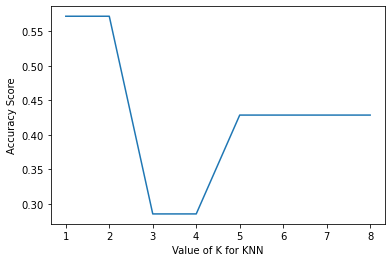

In [22]:
plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Accuracy Score")

C:\Users\jasro\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jasro\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jasro\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jasro\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\jasro\anaconda3\lib\site-packages\s

Text(0, 0.5, 'Cross Validated Accuracy')

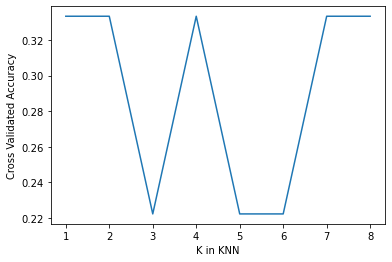

In [28]:
optimal_neighbors = 5 # CHANGE THIS 
knn = KNeighborsClassifier(n_neighbors=optimal_neighbors)
amountOfFolds = 9 # change this 
scores = cross_val_score(knn, features, target, cv=amountOfFolds, scoring="accuracy") # cv = amount of folds

# finding optimal value for K for KNN 
k_range = list(range(1,9)) # change this 
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, features, target, cv=amountOfFolds, scoring="accuracy")
    k_scores.append(scores.mean())
# print(k_scores)

# plotting findings 
plt.plot(k_range, k_scores)
plt.xlabel("K in KNN")
plt.ylabel("Cross Validated Accuracy")

#choose value that produces the simplest model, for KNN high K produces simpler models, thus K=20 is best model in this case

In [11]:
data.head()

,Unnamed: 0,ID,compactness,red_std,green_std,blue_std,flatness,cornerness,edgeness
0,0,ISIC_0012143,666.471459,8.351573,13.137066,16.037848,0.791692,0.099738,0.085625
1,1,ISIC_0012204,420.471019,6.800855,12.340289,13.295118,0.755682,0.130098,0.081424
2,2,ISIC_0012210,790.833691,1.729475,5.762820,7.301317,0.844999,0.086524,0.046422
3,3,ISIC_0012254,518.804289,3.217556,7.673179,6.179343,1.000000,0.000000,0.000000
4,4,ISIC_0012143,666.471459,8.351573,13.137066,16.037848,0.791692,0.099738,0.085625
